# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 02 · Notebook 03 — EDA Visualization Patterns
**Instructor:** Amir Charkhi  |  **Goal:** Covers essential visualization patterns for exploratory data analysis (EDA).

> Format:
- Distribution analysis
- Correlation visualization
- Time series visualization
- Categorical analysis
- Multivariate visualization

In [ ]:
#!pip install squarify
#%pip install statsmodels
#!pip install calplot

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Additional visualization libraries
try:
    import squarify  # for treemaps
except ImportError:
    print("Install squarify: pip install squarify")

from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

try:
    import calplot  # for calendar heatmaps
except ImportError:
    print("Install calplot: pip install calplot")

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Plotly template
import plotly.io as pio
pio.templates.default = "plotly_white"

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
pio.renderers.default = 'iframe'

## Sample Data Generation

Let's create diverse datasets to demonstrate different visualization patterns.

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data for distribution analysis
n_samples = 1000
data = {
    'normal': np.random.normal(50, 15, n_samples),
    'exponential': np.random.exponential(2, n_samples),
    'uniform': np.random.uniform(0, 100, n_samples),
    'bimodal': np.concatenate([np.random.normal(30, 5, n_samples//2), 
                              np.random.normal(70, 8, n_samples//2)]),
    'category': np.random.choice(['A', 'B', 'C', 'D'], n_samples, p=[0.4, 0.3, 0.2, 0.1])
}

# Create main DataFrame
df = pd.DataFrame(data)

# Generate correlated features
df['corr_positive'] = df['normal'] * 0.8 + np.random.normal(0, 10, n_samples)
df['corr_negative'] = -df['normal'] * 0.6 + np.random.normal(50, 8, n_samples)
df['independent'] = np.random.normal(25, 12, n_samples)

# Generate time series data
dates = pd.date_range('2020-01-01', periods=365*3, freq='D')
trend = np.linspace(100, 150, len(dates))
seasonal = 10 * np.sin(2 * np.pi * np.arange(len(dates)) / 365.25)
noise = np.random.normal(0, 5, len(dates))
ts_values = trend + seasonal + noise

ts_df = pd.DataFrame({
    'date': dates,
    'value': ts_values,
    'month': dates.month,
    'year': dates.year,
    'day_of_week': dates.dayofweek
})

# Generate categorical data
categories_df = pd.DataFrame({
    'region': np.random.choice(['North', 'South', 'East', 'West'], 500),
    'product': np.random.choice(['A', 'B', 'C', 'D', 'E'], 500),
    'sales': np.random.gamma(2, 50, 500),
    'profit_margin': np.random.uniform(0.1, 0.4, 500)
})

print(f"Main dataset shape: {df.shape}")
print(f"Time series dataset shape: {ts_df.shape}")
print(f"Categorical dataset shape: {categories_df.shape}")
print("\nSample data:")
print(df.head())

Main dataset shape: (1000, 8)
Time series dataset shape: (1095, 5)
Categorical dataset shape: (500, 4)

Sample data:
      normal  exponential    uniform    bimodal category  corr_positive  \
0  57.450712     0.366602  21.906881  26.966499        D      54.357208   
1  47.926035     0.220898   3.672136  31.056418        D      24.765653   
2  59.715328     2.023568  10.802575  36.000395        C      38.765549   
3  72.845448     2.451590  33.886065  27.540488        A      48.634358   
4  46.487699     0.064191  80.258568  20.617236        C      47.990720   

   corr_negative  independent  
0       4.241118    14.166293  
1      27.669617    34.711176  
2      16.087823    26.401962  
3      12.157166     9.572908  
4       6.965283    35.560792  


# 1. Distribution Analysis

Understanding data distributions is fundamental to EDA. We'll explore various visualization techniques for univariate distributions.

## 1.1 Histograms and KDE Plots

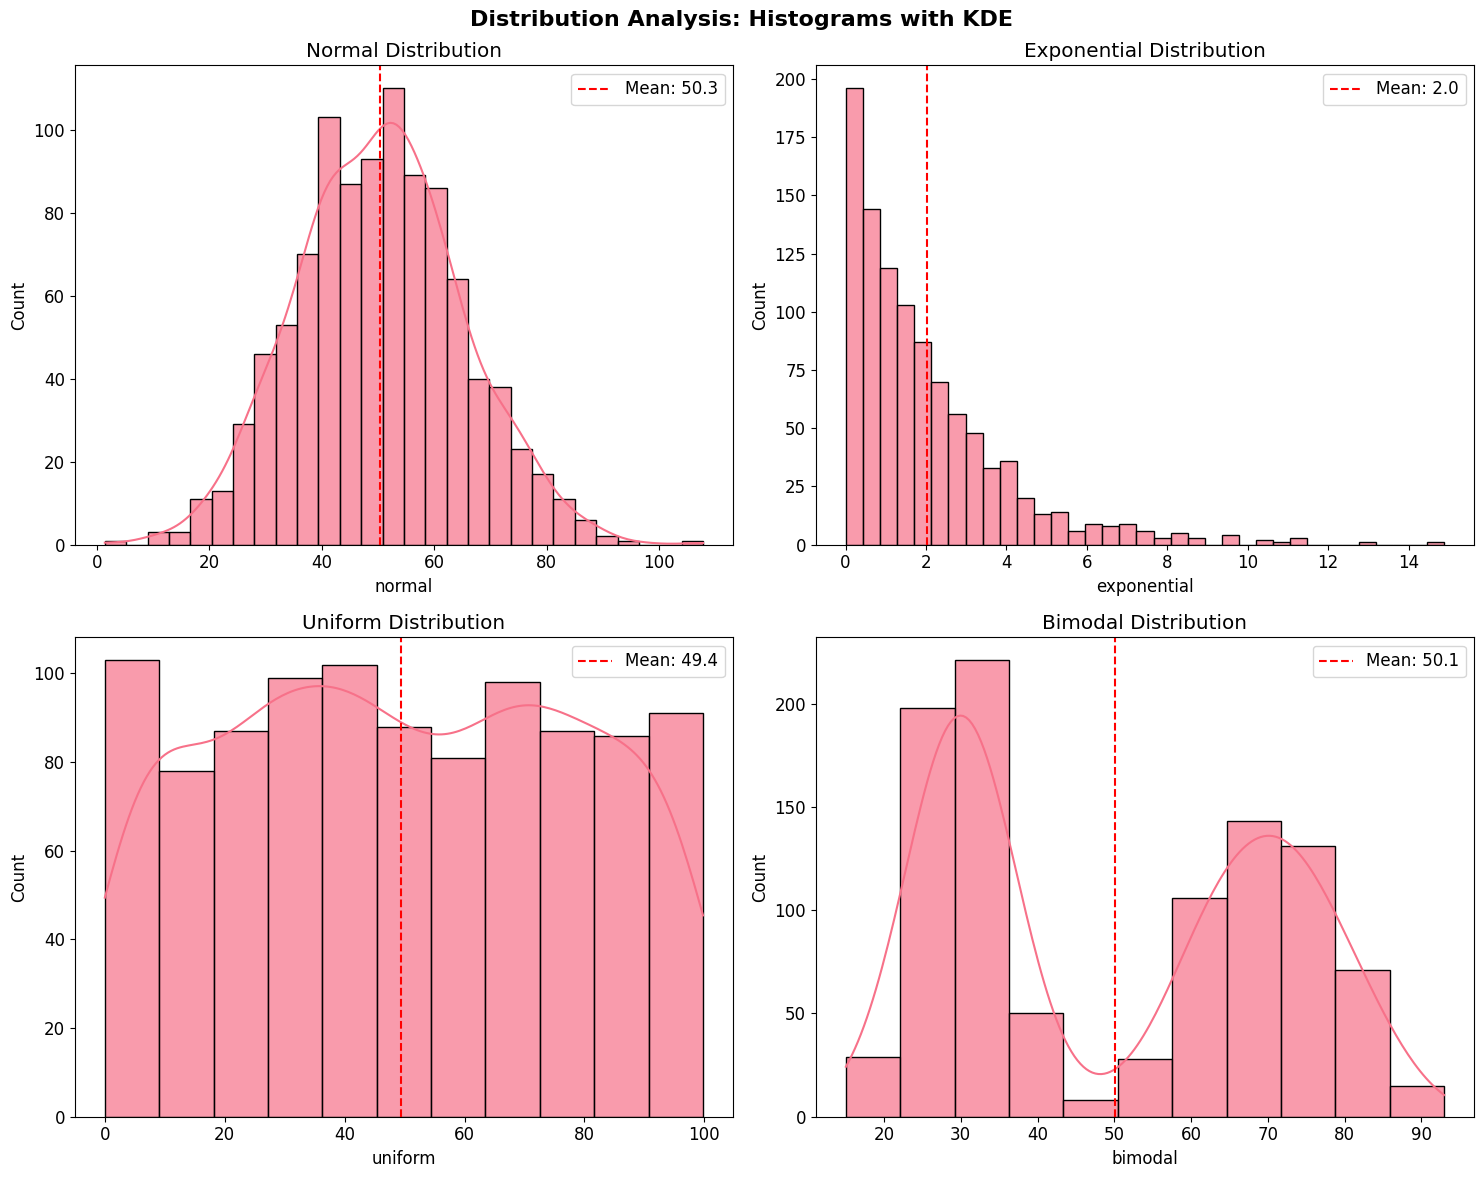

In [4]:
# Create subplots for different distribution types
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution Analysis: Histograms with KDE', fontsize=16, fontweight='bold')

# Normal distribution
sns.histplot(data=df, x='normal', kde=True, ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Normal Distribution')
axes[0,0].axvline(df['normal'].mean(), color='red', linestyle='--', label=f'Mean: {df["normal"].mean():.1f}')
axes[0,0].legend()

# Exponential distribution
sns.histplot(data=df, x='exponential', kde=False, ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Exponential Distribution')
axes[0,1].axvline(df['exponential'].mean(), color='red', linestyle='--', label=f'Mean: {df["exponential"].mean():.1f}')
axes[0,1].legend()

# Uniform distribution
sns.histplot(data=df, x='uniform', kde=True, ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('Uniform Distribution')
axes[1,0].axvline(df['uniform'].mean(), color='red', linestyle='--', label=f'Mean: {df["uniform"].mean():.1f}')
axes[1,0].legend()

# Bimodal distribution
sns.histplot(data=df, x='bimodal', kde=True, ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Bimodal Distribution')
axes[1,1].axvline(df['bimodal'].mean(), color='red', linestyle='--', label=f'Mean: {df["bimodal"].mean():.1f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 1.2 Violin Plots

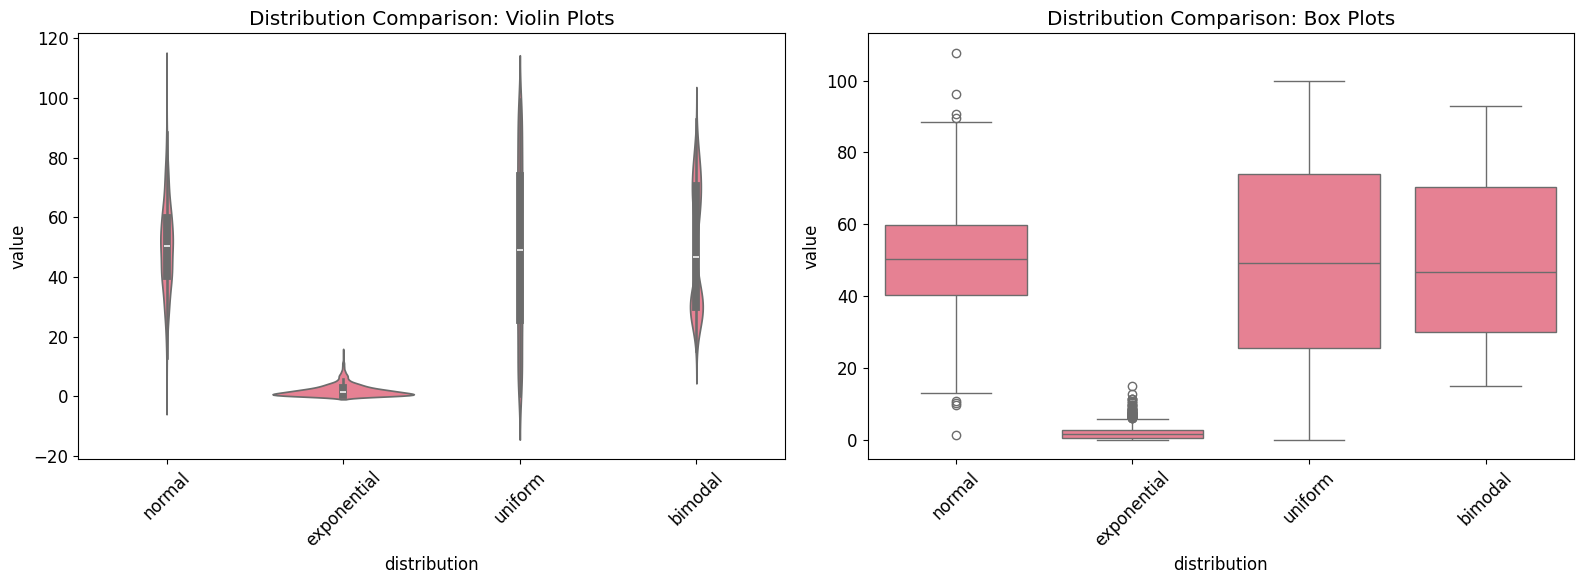

In [5]:
# Prepare data for violin plots
violin_data = df[['normal', 'exponential', 'uniform', 'bimodal']].melt(var_name='distribution', value_name='value')

# Create violin plots with matplotlib/seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Seaborn violin plot
sns.violinplot(data=violin_data, x='distribution', y='value', ax=ax1)
ax1.set_title('Distribution Comparison: Violin Plots')
ax1.tick_params(axis='x', rotation=45)

# Box plot for comparison
sns.boxplot(data=violin_data, x='distribution', y='value', ax=ax2)
ax2.set_title('Distribution Comparison: Box Plots')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Interactive violin plot with Plotly
fig = go.Figure()

for col in ['normal', 'exponential', 'uniform', 'bimodal']:
    fig.add_trace(go.Violin(y=df[col], name=col, box_visible=True, meanline_visible=True))

fig.update_layout(
    title='Interactive Distribution Comparison: Violin Plots',
    yaxis_title='Value',
    xaxis_title='Distribution Type'
)

fig.show()

## 1.3 Ridgeline Plots

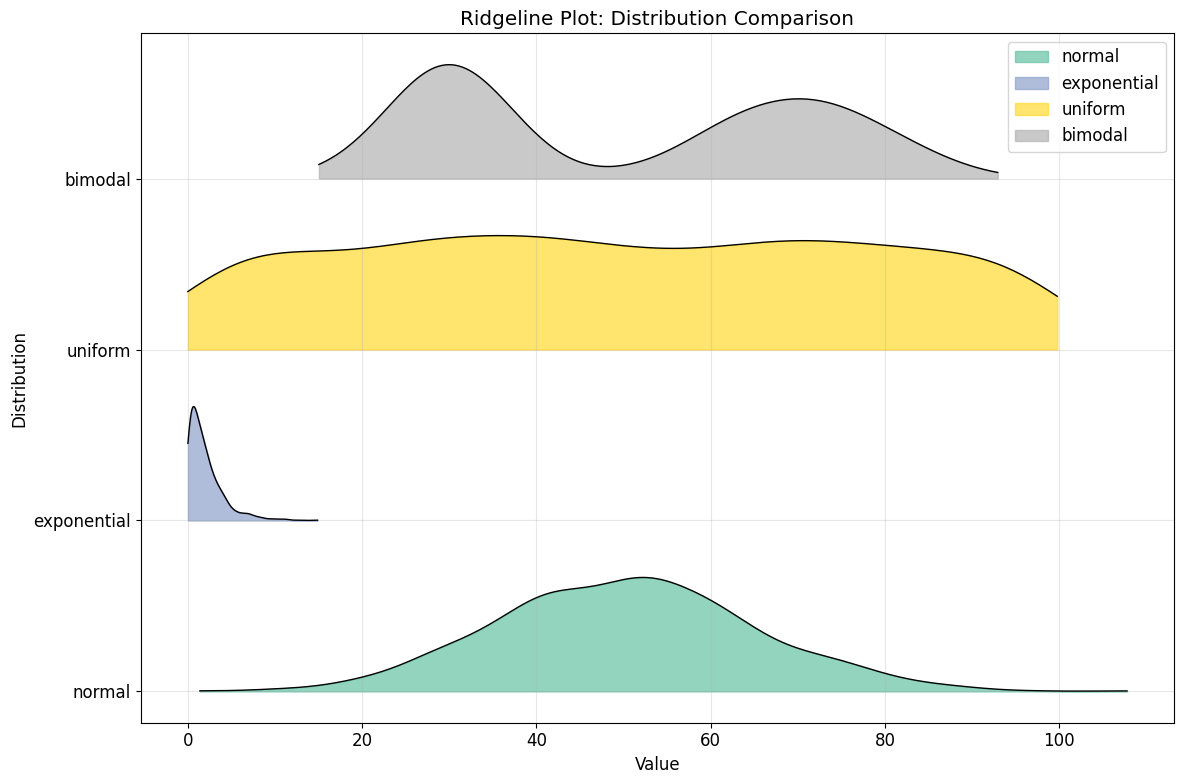

In [6]:
# Create ridgeline plot (stacked density plots)
fig, ax = plt.subplots(figsize=(12, 8))

distributions = ['normal', 'exponential', 'uniform', 'bimodal']
colors = plt.cm.Set2(np.linspace(0, 1, len(distributions)))

for i, dist in enumerate(distributions):
    # Create density plot
    data_vals = df[dist]
    density = stats.gaussian_kde(data_vals)
    xs = np.linspace(data_vals.min(), data_vals.max(), 200)
    ys = density(xs)
    
    # Normalize and offset for ridgeline effect
    ys = ys / ys.max() * 0.8  # Scale height
    ys = ys + i * 1.2  # Offset vertically
    
    # Fill area under curve
    ax.fill_between(xs, i * 1.2, ys, alpha=0.7, color=colors[i], label=dist)
    ax.plot(xs, ys, color='black', linewidth=1)

ax.set_xlabel('Value')
ax.set_ylabel('Distribution')
ax.set_title('Ridgeline Plot: Distribution Comparison')
ax.set_yticks([i * 1.2 for i in range(len(distributions))])
ax.set_yticklabels(distributions)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Correlation Visualization

Exploring relationships between variables is crucial for understanding data structure and identifying patterns.

## 2.1 Correlation Heatmaps

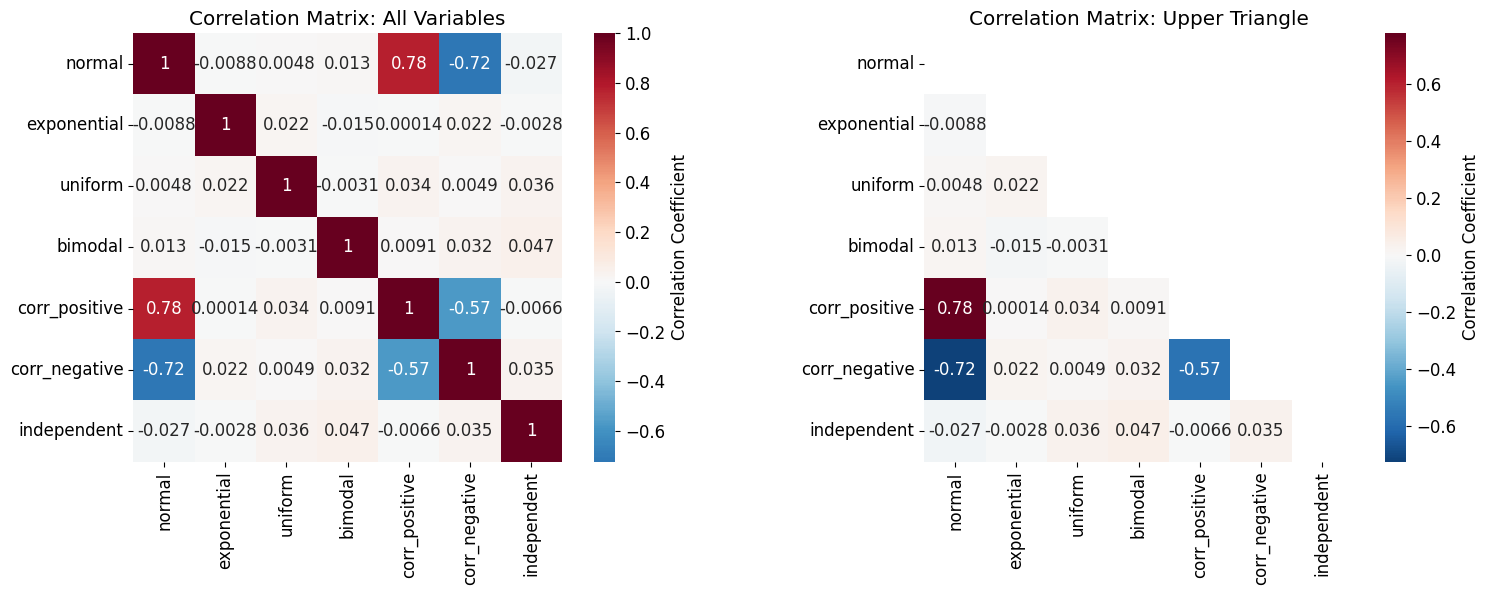

In [7]:
# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap with seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Standard heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=ax1, cbar_kws={'label': 'Correlation Coefficient'})
ax1.set_title('Correlation Matrix: All Variables')

# Masked heatmap (hide lower triangle)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            mask=mask, square=True, ax=ax2, cbar_kws={'label': 'Correlation Coefficient'})
ax2.set_title('Correlation Matrix: Upper Triangle')

plt.tight_layout()
plt.show()

# Interactive heatmap with Plotly
fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                aspect="auto",
                color_continuous_scale='RdBu_r',
                title='Interactive Correlation Matrix')
fig.update_coloraxes(cmid=0)
fig.show()

## 2.2 Pair Plots

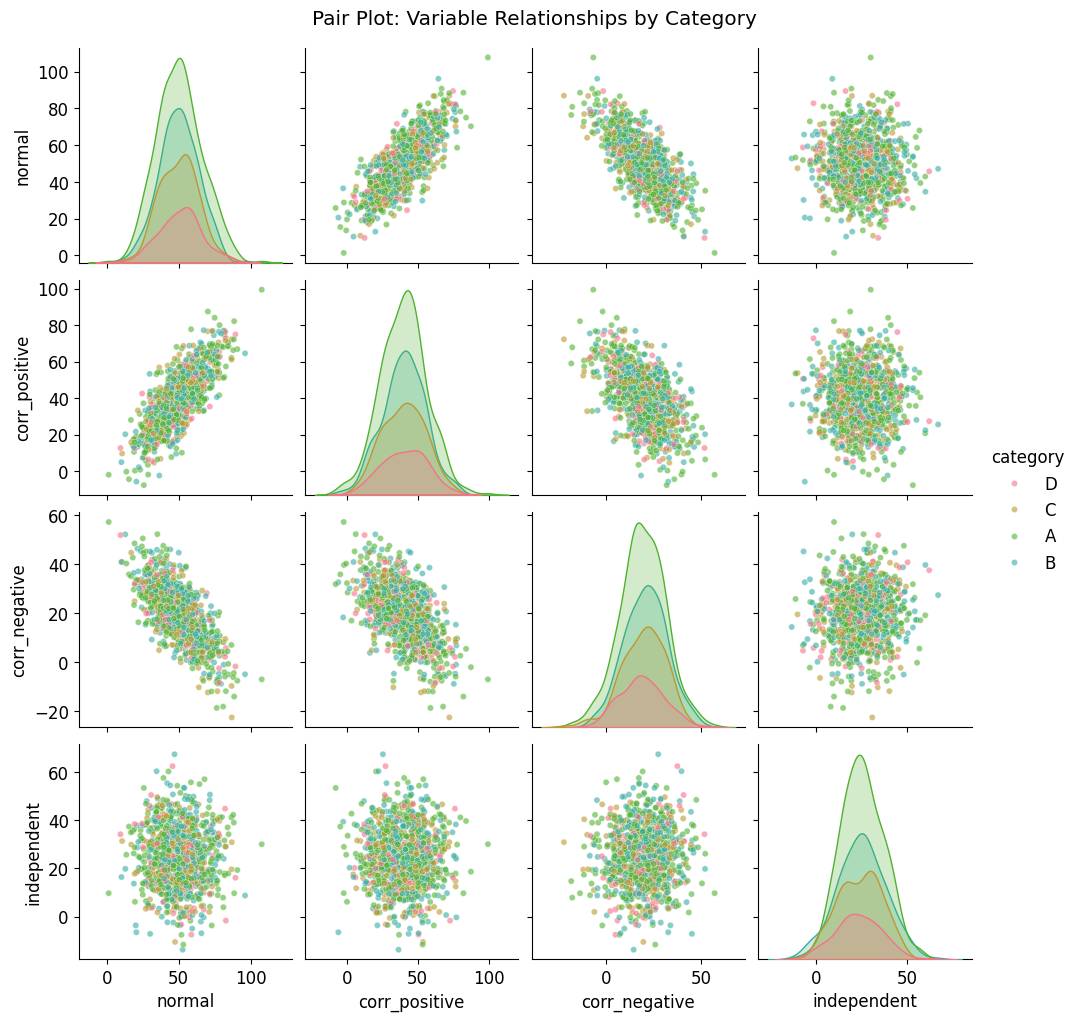

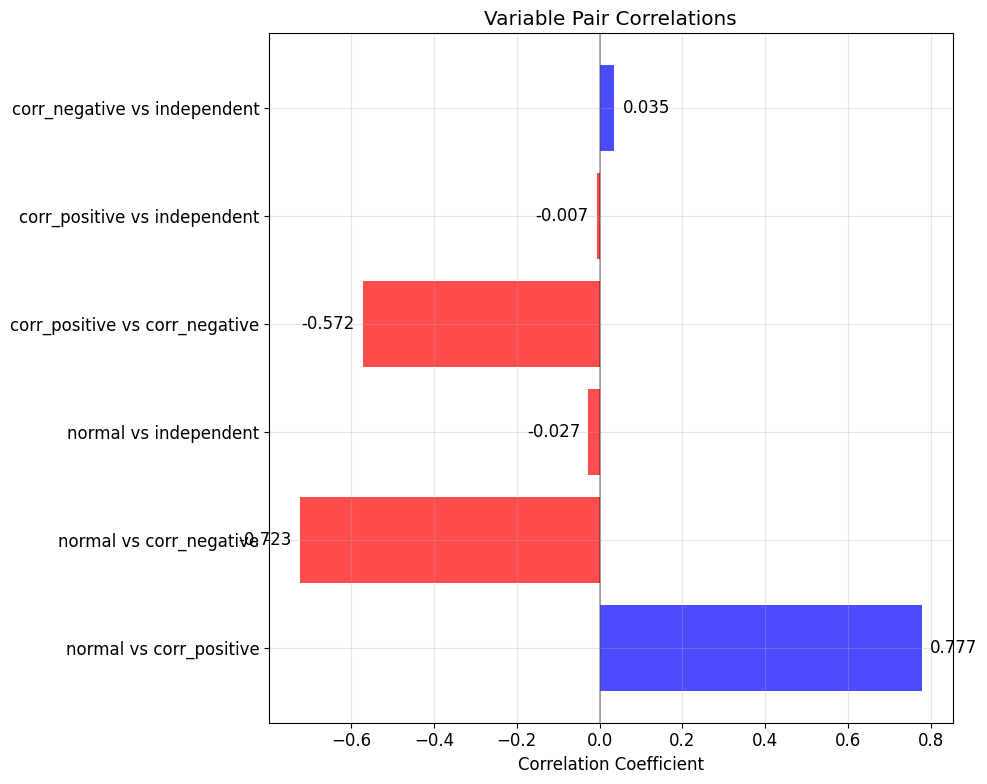

In [8]:
# Create pair plot with a subset of variables
pair_vars = ['normal', 'corr_positive', 'corr_negative', 'independent']
pair_data = df[pair_vars + ['category']]

# Seaborn pairplot
g = sns.pairplot(pair_data, hue='category', diag_kind='kde', 
                 plot_kws={'alpha': 0.6, 's': 20})
g.fig.suptitle('Pair Plot: Variable Relationships by Category', y=1.02)
plt.show()

# Correlation strength visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate correlations and create scatter plot matrix
pair_corr = df[pair_vars].corr()
mask = np.triu(np.ones_like(pair_corr, dtype=bool), k=1)

# Extract upper triangle correlations
correlations = []
var_pairs = []

for i in range(len(pair_vars)):
    for j in range(i+1, len(pair_vars)):
        correlations.append(pair_corr.iloc[i, j])
        var_pairs.append(f"{pair_vars[i]} vs {pair_vars[j]}")

# Create bar plot of correlations
colors = ['red' if x < 0 else 'blue' for x in correlations]
bars = ax.barh(var_pairs, correlations, color=colors, alpha=0.7)
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Variable Pair Correlations')
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3)

# Add correlation values as text
for bar, corr in zip(bars, correlations):
    ax.text(corr + (0.02 if corr > 0 else -0.02), bar.get_y() + bar.get_height()/2, 
            f'{corr:.3f}', ha='left' if corr > 0 else 'right', va='center')

plt.tight_layout()
plt.show()

## 2.3 Parallel Coordinates

In [ ]:
#!pip install scikit-learn

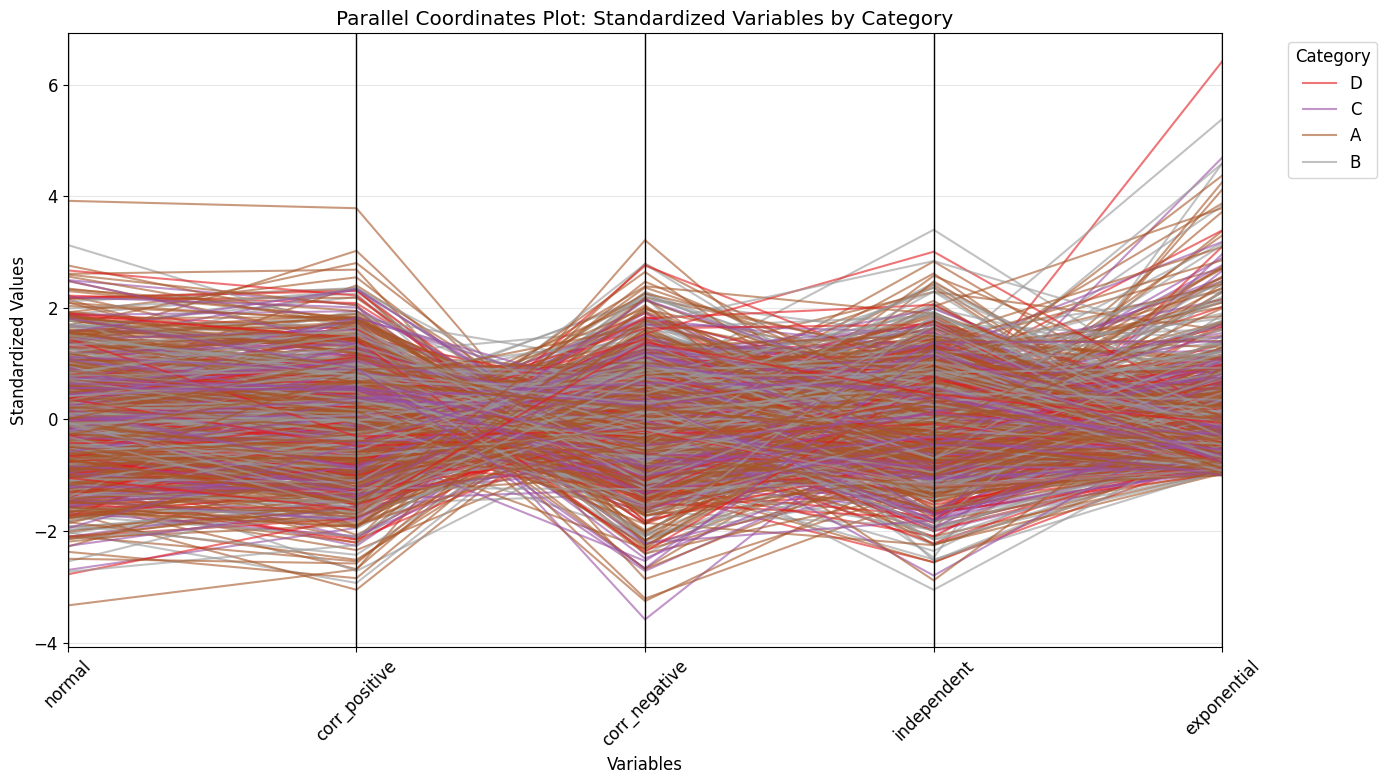

In [9]:
# --- Prepare data for parallel coordinates (normalize for better visualization) ---
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px

# Select features and standardize
features = ['normal', 'corr_positive', 'corr_negative', 'independent', 'exponential']
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[features])
normalized_df = pd.DataFrame(normalized_data, columns=features)

# Keep category column
normalized_df['category'] = df['category'].astype(str).values

# --- Matplotlib parallel coordinates ---
plt.figure(figsize=(14, 8))
parallel_coordinates(normalized_df, 'category', alpha=0.6, colormap='Set1')
plt.title('Parallel Coordinates Plot: Standardized Variables by Category')
plt.xlabel('Variables')
plt.ylabel('Standardized Values')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Plotly parallel coordinates ---
# Encode category → numeric codes (Plotly requires numeric color)
cats = sorted(normalized_df['category'].unique())
cat_to_int = {c: i for i, c in enumerate(cats)}
normalized_df['category_code'] = normalized_df['category'].map(cat_to_int).astype(float)

fig = px.parallel_coordinates(
    normalized_df,
    dimensions=features,
    color='category_code',
    color_continuous_scale='Viridis',
    title='Interactive Parallel Coordinates Plot'
)

# Show real category labels on the colorbar
fig.update_coloraxes(
    colorbar=dict(
        title='Category',
        tickmode='array',
        tickvals=list(cat_to_int.values()),
        ticktext=list(cat_to_int.keys())
    )
)

fig.show()


# 3. Time Series Visualization

Time series data requires specialized visualization techniques to reveal temporal patterns, trends, and seasonality.

## 3.1 Line Plots and Trend Analysis

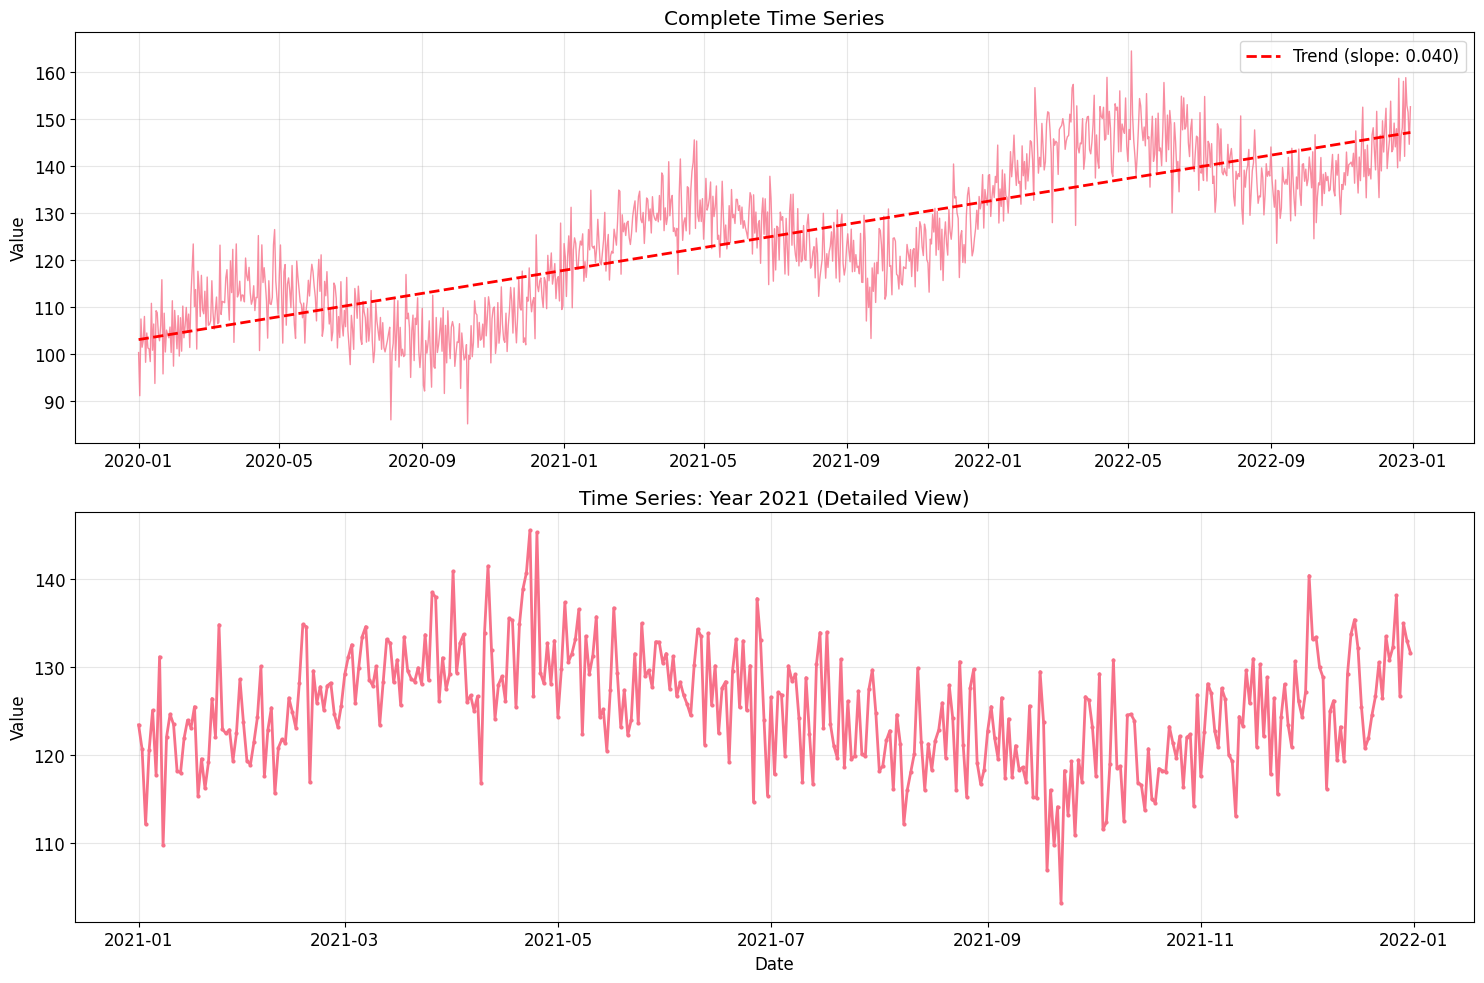

In [10]:
# Basic time series line plot
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Full time series
axes[0].plot(ts_df['date'], ts_df['value'], linewidth=1, alpha=0.8)
axes[0].set_title('Complete Time Series')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(range(len(ts_df)), ts_df['value'], 1)
trend_line = np.poly1d(z)
axes[0].plot(ts_df['date'], trend_line(range(len(ts_df))), 
            'r--', linewidth=2, label=f'Trend (slope: {z[0]:.3f})')
axes[0].legend()

# Zoom into one year
year_2021 = ts_df[ts_df['year'] == 2021]
axes[1].plot(year_2021['date'], year_2021['value'], linewidth=2, marker='o', markersize=2)
axes[1].set_title('Time Series: Year 2021 (Detailed View)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interactive time series with Plotly
fig = go.Figure()

# Add main time series
fig.add_trace(go.Scatter(x=ts_df['date'], y=ts_df['value'], 
                        mode='lines', name='Time Series',
                        line=dict(width=1)))

# Add trend line
fig.add_trace(go.Scatter(x=ts_df['date'], y=trend_line(range(len(ts_df))),
                        mode='lines', name='Trend',
                        line=dict(dash='dash', width=2, color='red')))

fig.update_layout(title='Interactive Time Series with Trend',
                 xaxis_title='Date',
                 yaxis_title='Value',
                 hovermode='x unified')

fig.show()

## 3.2 Seasonal Decomposition

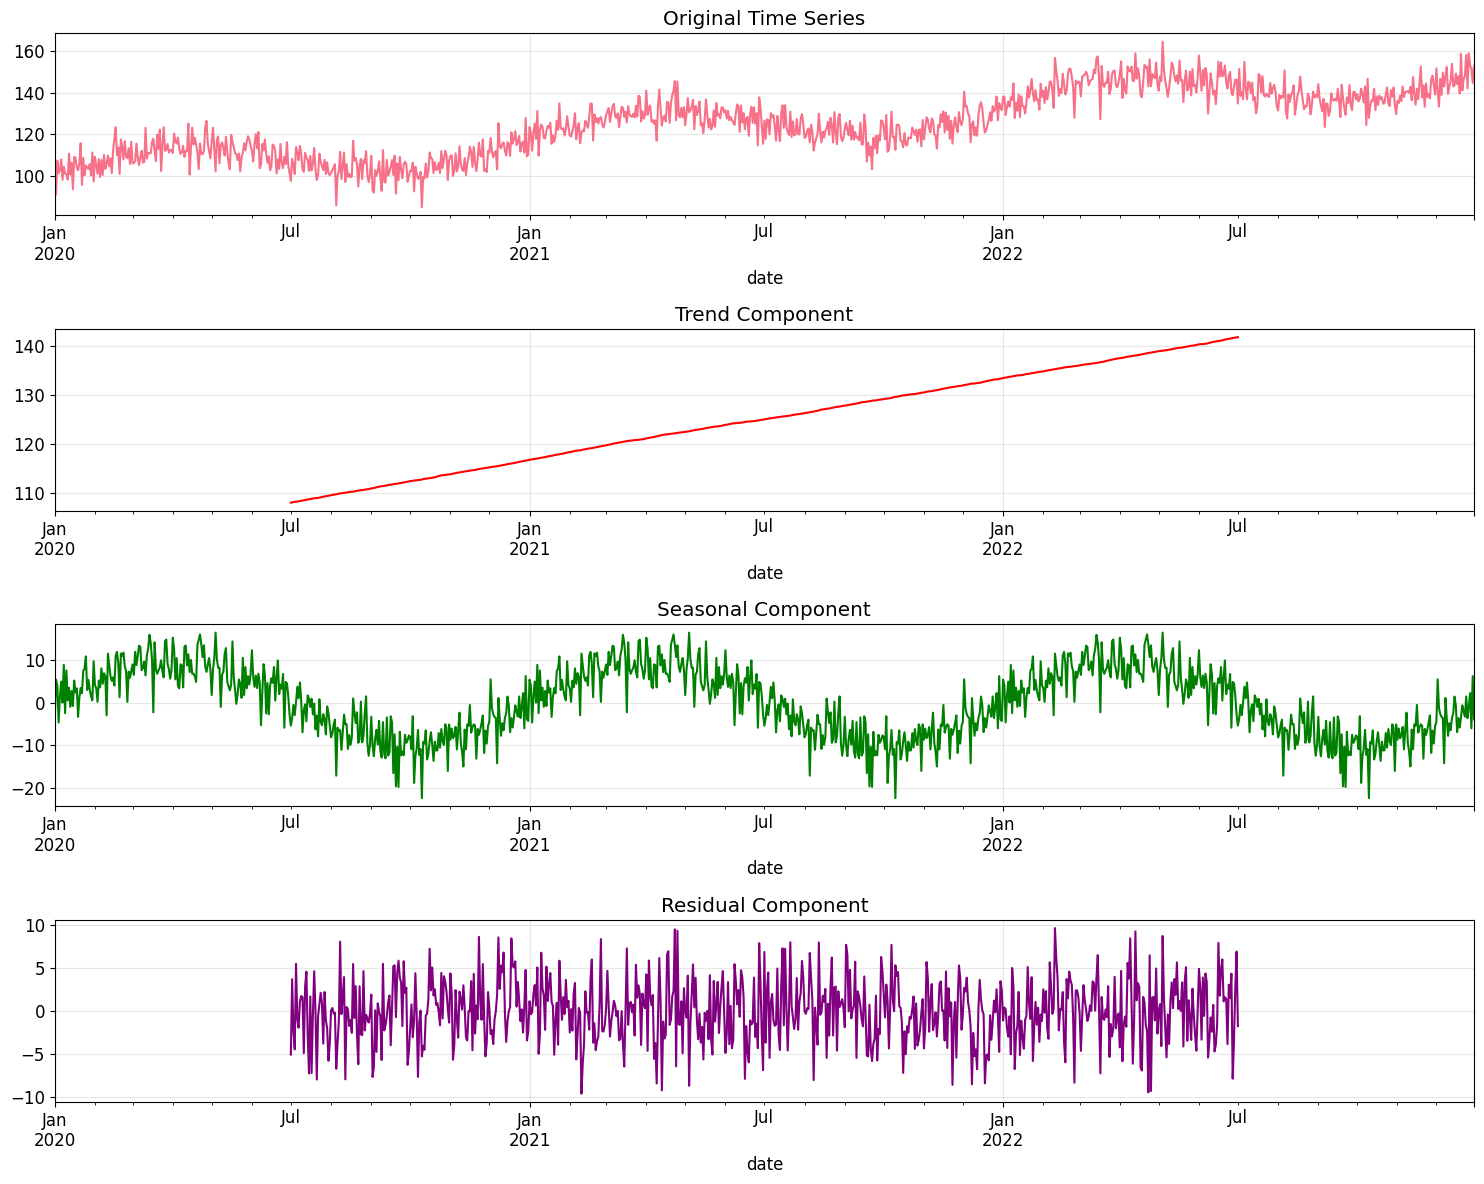

Seasonal Decomposition Summary:
  Component    Mean    Std     Min     Max
0  Original  125.03  15.40   85.05  164.42
1     Trend  125.09   9.68  108.11  141.89
2  Seasonal    0.00   8.03  -22.50   16.58
3  Residual    0.01   3.64   -9.61    9.64


In [11]:
# Perform seasonal decomposition
ts_df_indexed = ts_df.set_index('date')
decomposition = seasonal_decompose(ts_df_indexed['value'], 
                                  model='additive', period=365)

# Plot decomposition components
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Original
decomposition.observed.plot(ax=axes[0], title='Original Time Series')
axes[0].grid(True, alpha=0.3)

# Trend
decomposition.trend.plot(ax=axes[1], title='Trend Component', color='red')
axes[1].grid(True, alpha=0.3)

# Seasonal
decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component', color='green')
axes[2].grid(True, alpha=0.3)

# Residual
decomposition.resid.plot(ax=axes[3], title='Residual Component', color='purple')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics for each component
components_summary = pd.DataFrame({
    'Component': ['Original', 'Trend', 'Seasonal', 'Residual'],
    'Mean': [decomposition.observed.mean(), decomposition.trend.mean(), 
             decomposition.seasonal.mean(), decomposition.resid.mean()],
    'Std': [decomposition.observed.std(), decomposition.trend.std(), 
            decomposition.seasonal.std(), decomposition.resid.std()],
    'Min': [decomposition.observed.min(), decomposition.trend.min(), 
            decomposition.seasonal.min(), decomposition.resid.min()],
    'Max': [decomposition.observed.max(), decomposition.trend.max(), 
            decomposition.seasonal.max(), decomposition.resid.max()]
})

print("Seasonal Decomposition Summary:")
print(components_summary.round(2))

## 3.3 Calendar Heatmaps

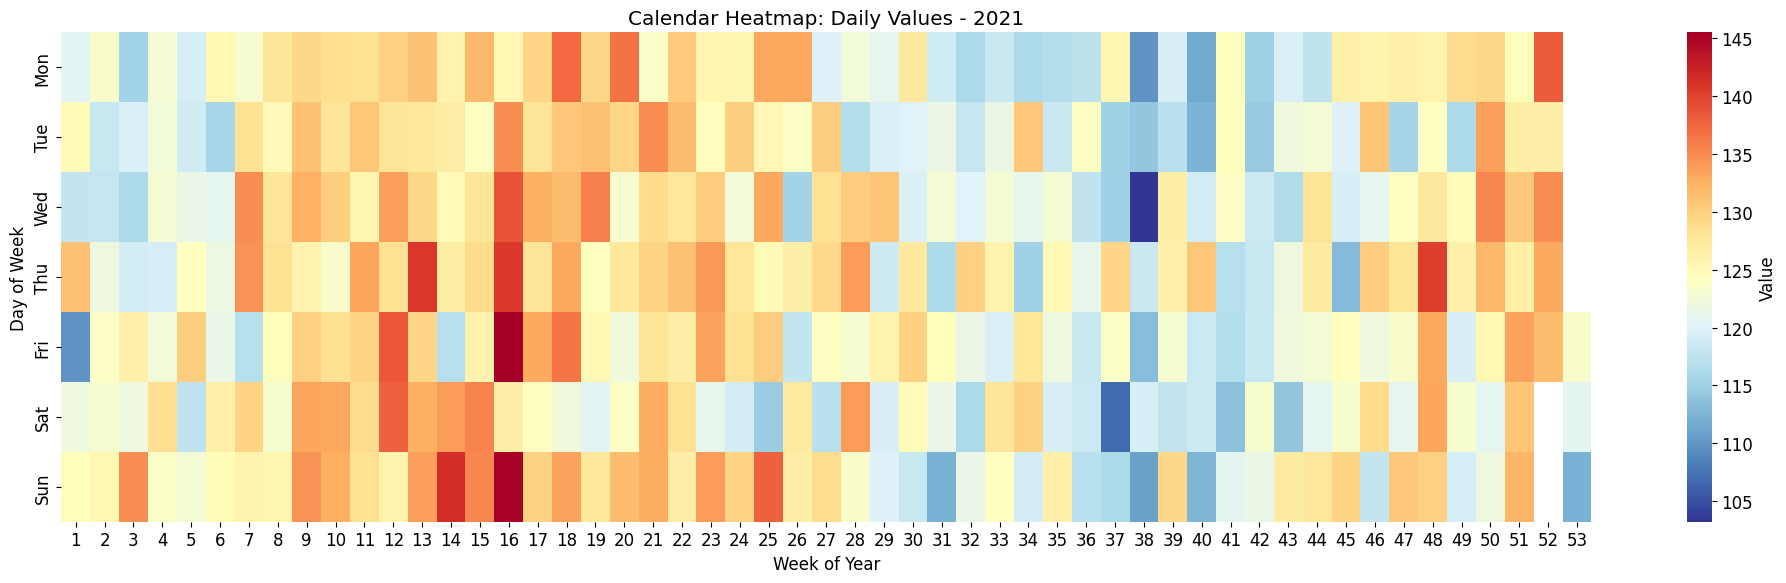

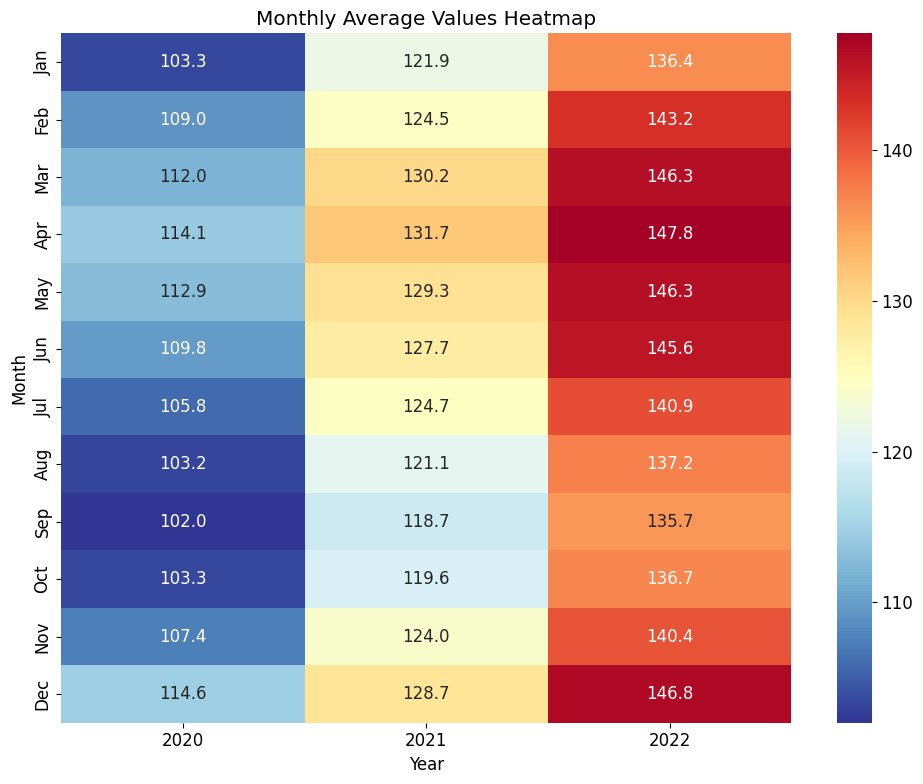

In [12]:
# Manual calendar heatmap with matplotlib
def create_calendar_heatmap(data, year, title):
    year_data = data[data['year'] == year].copy()
    
    # Create pivot table for heatmap (week of year vs day of week)
    year_data['week'] = year_data['date'].dt.isocalendar().week
    year_data['dayofweek'] = year_data['date'].dt.dayofweek
    
    calendar_pivot = year_data.pivot_table(values='value', 
                                          index='dayofweek', 
                                          columns='week', 
                                          fill_value=np.nan)
    
    plt.figure(figsize=(20, 6))
    sns.heatmap(calendar_pivot, cmap='RdYlBu_r', cbar=True,
                yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                cbar_kws={'label': 'Value'})
    plt.title(f'{title} - {year}')
    plt.xlabel('Week of Year')
    plt.ylabel('Day of Week')
    plt.tight_layout()
    plt.show()

create_calendar_heatmap(ts_df, 2021, 'Calendar Heatmap: Daily Values')

# Monthly aggregation heatmap
monthly_data = ts_df.groupby(['year', 'month'])['value'].mean().reset_index()
monthly_pivot = monthly_data.pivot(index='month', columns='year', values='value')

plt.figure(figsize=(10, 8))
sns.heatmap(monthly_pivot, annot=True, fmt='.1f', cmap='RdYlBu_r',
            yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Average Values Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# 4. Categorical Analysis

Visualizing categorical data requires different approaches to show distributions, relationships, and hierarchies.

## 4.1 Bar Charts and Variations

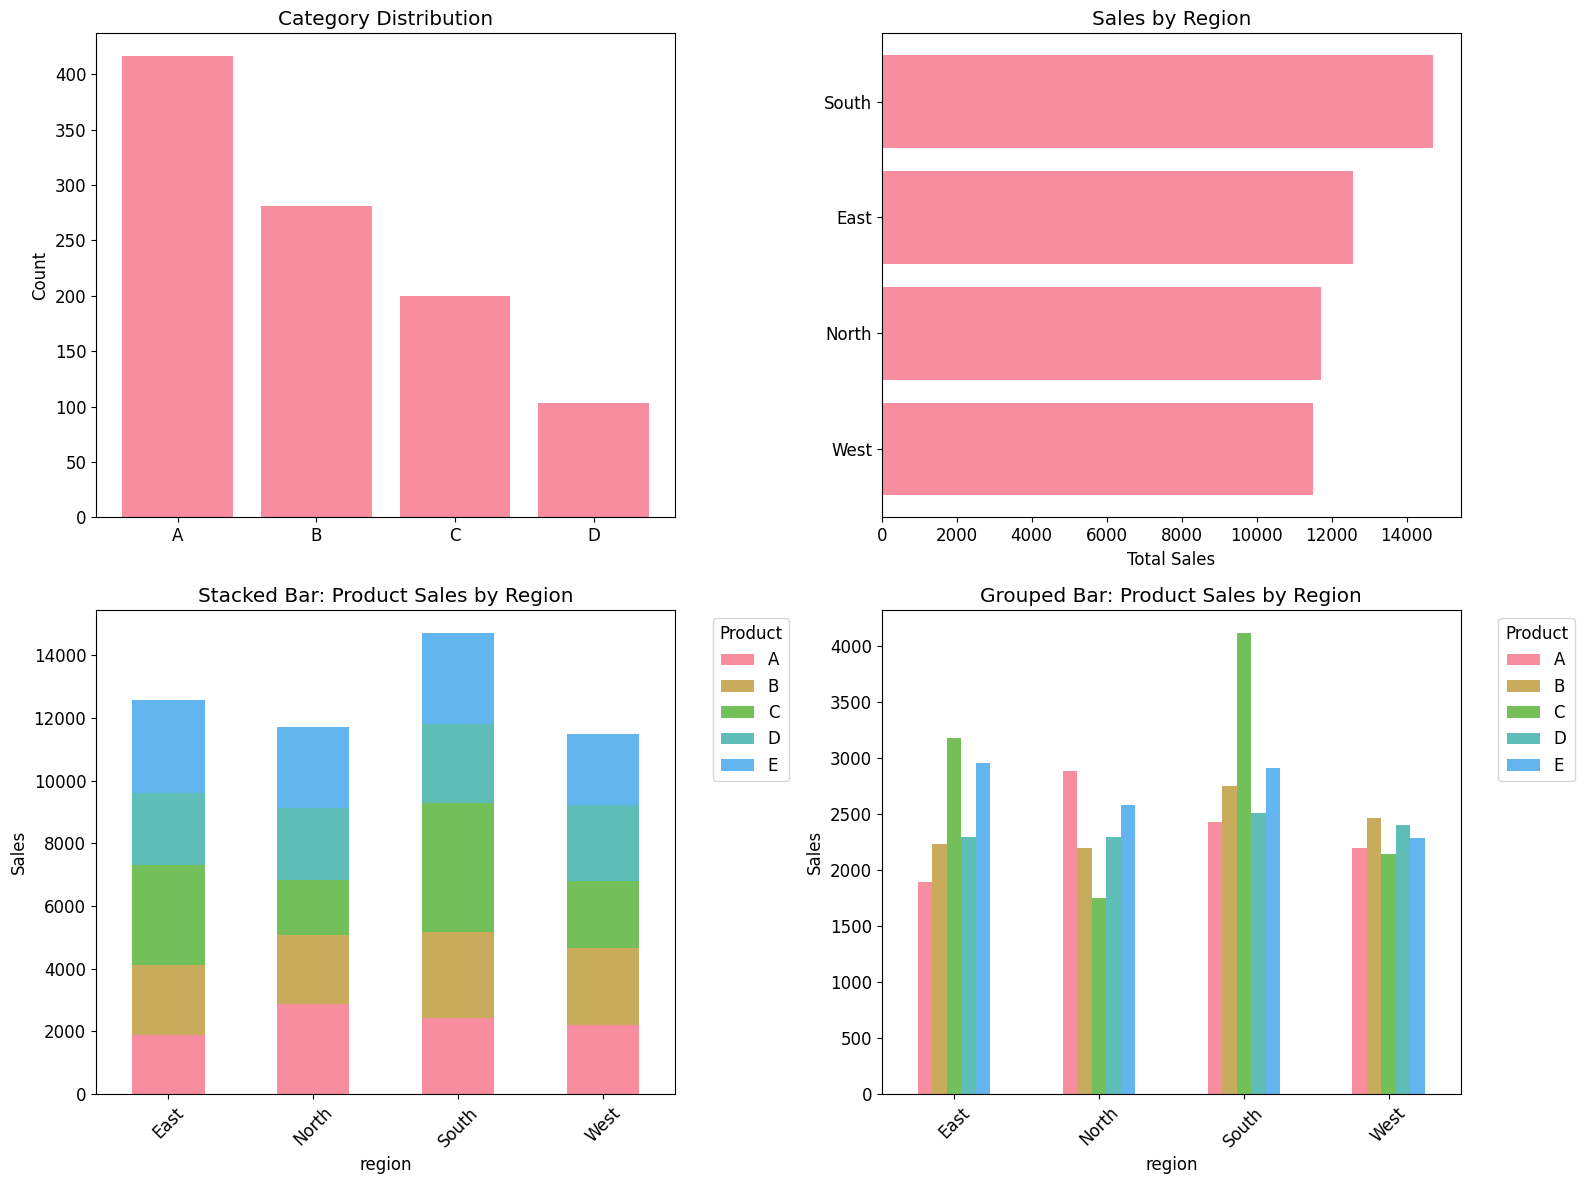

In [13]:
# Basic bar charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Simple bar chart - category counts
category_counts = df['category'].value_counts()
axes[0,0].bar(category_counts.index, category_counts.values, alpha=0.8)
axes[0,0].set_title('Category Distribution')
axes[0,0].set_ylabel('Count')

# Horizontal bar chart - regional sales
region_sales = categories_df.groupby('region')['sales'].sum().sort_values()
axes[0,1].barh(region_sales.index, region_sales.values, alpha=0.8)
axes[0,1].set_title('Sales by Region')
axes[0,1].set_xlabel('Total Sales')

# Stacked bar chart - product sales by region
product_region = categories_df.pivot_table(values='sales', index='region', 
                                          columns='product', aggfunc='sum', fill_value=0)
product_region.plot(kind='bar', stacked=True, ax=axes[1,0], alpha=0.8)
axes[1,0].set_title('Stacked Bar: Product Sales by Region')
axes[1,0].set_ylabel('Sales')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grouped bar chart
product_region.plot(kind='bar', ax=axes[1,1], alpha=0.8)
axes[1,1].set_title('Grouped Bar: Product Sales by Region')
axes[1,1].set_ylabel('Sales')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Interactive bar chart with Plotly
fig = px.bar(categories_df.groupby(['region', 'product'])['sales'].sum().reset_index(),
             x='region', y='sales', color='product',
             title='Interactive Grouped Bar Chart: Sales by Region and Product')
fig.show()

## 4.2 Treemaps

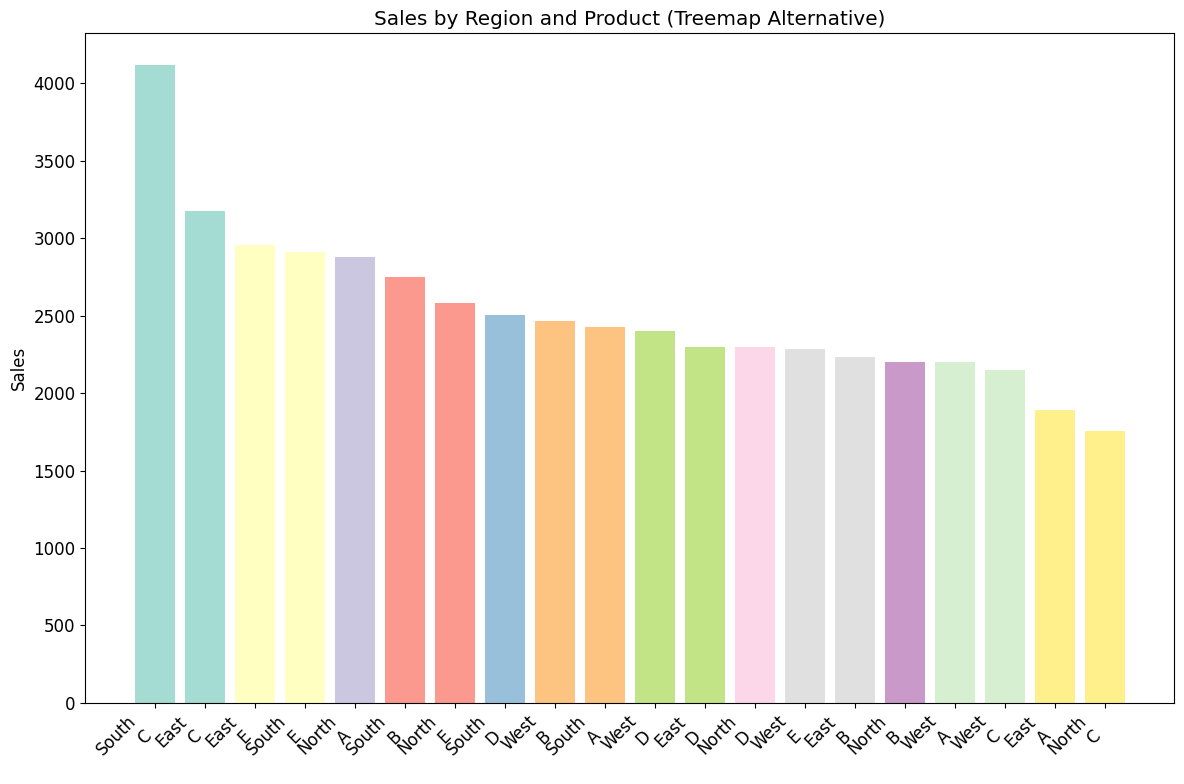

In [14]:
# Create treemap data
treemap_data = categories_df.groupby(['region', 'product']).agg({
    'sales': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Simple matplotlib treemap alternative using rectangles
fig, ax = plt.subplots(figsize=(12, 8))

# Create a simple treemap visualization
total_sales = treemap_data['sales'].sum()
treemap_data['percentage'] = treemap_data['sales'] / total_sales

# Sort by sales for better visualization
treemap_data = treemap_data.sort_values('sales', ascending=False)

# Create simple bar representation as treemap alternative
colors = plt.cm.Set3(np.linspace(0, 1, len(treemap_data)))
bars = ax.bar(range(len(treemap_data)), treemap_data['sales'], 
              color=colors, alpha=0.8)

# Add labels
labels = [f"{row['region']}\n{row['product']}" for _, row in treemap_data.iterrows()]
ax.set_xticks(range(len(treemap_data)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Sales')
ax.set_title('Sales by Region and Product (Treemap Alternative)')

plt.tight_layout()
plt.show()

# Interactive treemap with Plotly
fig = px.treemap(treemap_data, 
                 path=['region', 'product'], 
                 values='sales',
                 color='profit_margin',
                 color_continuous_scale='RdYlGn',
                 title='Interactive Treemap: Sales (size) and Profit Margin (color)')
fig.show()

# Hierarchical treemap with multiple levels
# Add a category level
np.random.seed(42)
treemap_data['category'] = np.random.choice(['Electronics', 'Clothing', 'Food'], len(treemap_data))

fig = px.treemap(treemap_data,
                 path=['category', 'region', 'product'],
                 values='sales',
                 color='profit_margin',
                 color_continuous_scale='Viridis',
                 title='Multi-level Treemap: Category → Region → Product')
fig.show()

## 4.3 Sunburst Charts

In [15]:
pio.renderers.default = 'iframe'

In [16]:
# Create sunburst chart with Plotly
sunburst_data = categories_df.groupby(['region', 'product']).agg({
    'sales': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Add category level for hierarchy
np.random.seed(42)
sunburst_data['category'] = np.random.choice(['Electronics', 'Clothing', 'Food'], len(sunburst_data))

# Basic sunburst
fig = px.sunburst(sunburst_data,
                  path=['category', 'region', 'product'],
                  values='sales',
                  color='profit_margin',
                  color_continuous_scale='RdYlGn',
                  title='Sunburst Chart: Sales Hierarchy with Profit Margin')
fig.show()

In [17]:
# original codes ==> no graphic display
# Alternative: Manual sunburst with go.Sunburst for more control
# Prepare hierarchical data
hierarchy_data = []
for _, row in sunburst_data.iterrows():
    hierarchy_data.extend([
        dict(ids=row['category'], labels=row['category'], parents=''),
        dict(ids=f"{row['category']}-{row['region']}", 
             labels=row['region'], 
             parents=row['category']),
        dict(ids=f"{row['category']}-{row['region']}-{row['product']}", 
             labels=row['product'], 
             parents=f"{row['category']}-{row['region']}",
             values=row['sales'])
    ])

# Remove duplicates
seen = set()
unique_hierarchy = []
for item in hierarchy_data:
    if item['ids'] not in seen:
        unique_hierarchy.append(item)
        seen.add(item['ids'])

# Create DataFrame for sunburst
sunburst_df = pd.DataFrame(unique_hierarchy)
sunburst_df['values'] = sunburst_df['values'].fillna(0)

fig = go.Figure(go.Sunburst(
    ids=sunburst_df['ids'],
    labels=sunburst_df['labels'],
    parents=sunburst_df['parents'],
    values=sunburst_df['values'],
    branchvalues="total",
))

fig.update_layout(title="Detailed Sunburst Chart: Category → Region → Product",
                 font_size=12)
fig.show()

In [18]:
# updated lines
# leaves
leaf = sunburst_data[['category','region','product','sales']].copy()
leaf['id']     = leaf['category']+'-'+leaf['region']+'-'+leaf['product']
leaf['parent'] = leaf['category']+'-'+leaf['region']
leaf = leaf.rename(columns={'product':'label','sales':'value'})[['id','label','parent','value']]

# region parents
reg = (sunburst_data.groupby(['category','region'], as_index=False)['sales'].sum())
reg['id']     = reg['category']+'-'+reg['region']
reg['parent'] = reg['category']
reg = reg.rename(columns={'region':'label','sales':'value'})[['id','label','parent','value']]

# category parents
cat = (reg.groupby('parent', as_index=False)['value'].sum()
         .rename(columns={'parent':'id','value':'value'}))
cat['label']  = cat['id']
cat['parent'] = ''  # root level
nodes = pd.concat([cat, reg, leaf], ignore_index=True)

fig = go.Figure(go.Sunburst(
    ids=nodes['id'], labels=nodes['label'], parents=nodes['parent'],
    values=nodes['value'], branchvalues='total'
))
fig.update_layout(title="Detailed Sunburst: Category → Region → Product",
                  margin=dict(t=60,l=0,r=0,b=0))
fig.show()


# 5. Multivariate Visualization

Advanced visualization techniques for exploring relationships among multiple variables simultaneously.

## 5.1 3D Scatter Plots

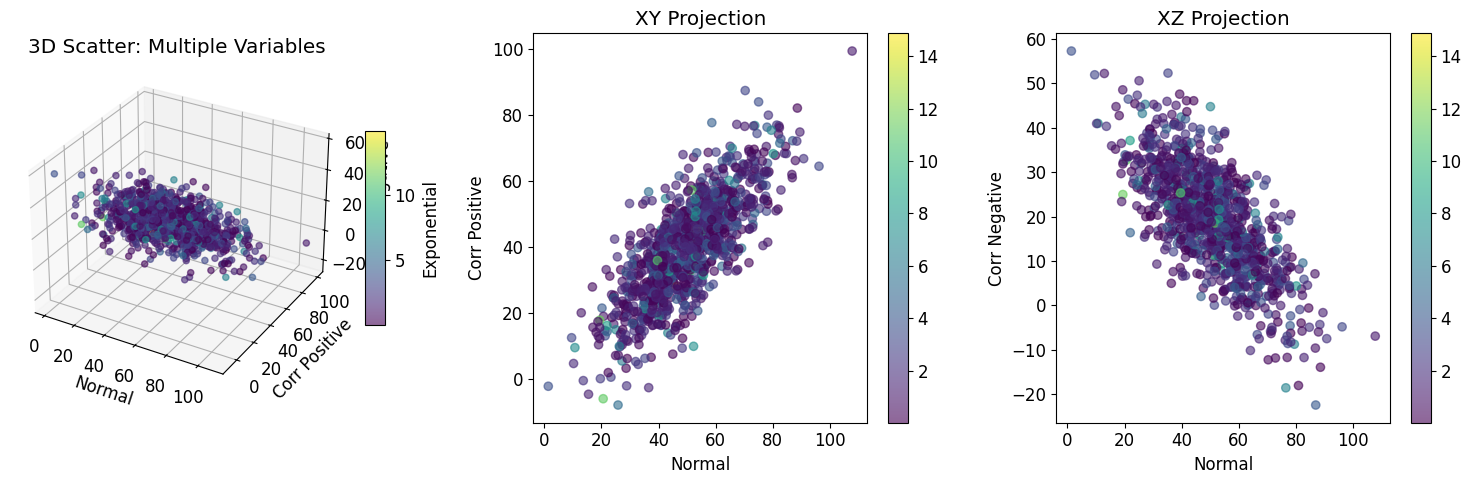

In [19]:
# Create 3D scatter plot with matplotlib
fig = plt.figure(figsize=(15, 5))

# Static 3D scatter plot
ax1 = fig.add_subplot(131, projection='3d')

# Use three continuous variables
x = df['normal']
y = df['corr_positive']
z = df['corr_negative']
colors = df['exponential']

scatter = ax1.scatter(x, y, z, c=colors, cmap='viridis', alpha=0.6)
ax1.set_xlabel('Normal')
ax1.set_ylabel('Corr Positive')
ax1.set_zlabel('Corr Negative')
ax1.set_title('3D Scatter: Multiple Variables')
plt.colorbar(scatter, ax=ax1, shrink=0.5, aspect=10, label='Exponential')

# 2D projections
ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(x, y, c=colors, cmap='viridis', alpha=0.6)
ax2.set_xlabel('Normal')
ax2.set_ylabel('Corr Positive')
ax2.set_title('XY Projection')
plt.colorbar(scatter2, ax=ax2)

ax3 = fig.add_subplot(133)
scatter3 = ax3.scatter(x, z, c=colors, cmap='viridis', alpha=0.6)
ax3.set_xlabel('Normal')
ax3.set_ylabel('Corr Negative')
ax3.set_title('XZ Projection')
plt.colorbar(scatter3, ax=ax3)

plt.tight_layout()
plt.show()

# Interactive 3D scatter with Plotly
fig = px.scatter_3d(df, x='normal', y='corr_positive', z='corr_negative',
                   color='exponential', size='uniform',
                   hover_data=['category'],
                   title='Interactive 3D Scatter Plot',
                   color_continuous_scale='viridis')

fig.update_traces(marker=dict(line=dict(width=0)))
fig.show()

## 5.2 Bubble Charts

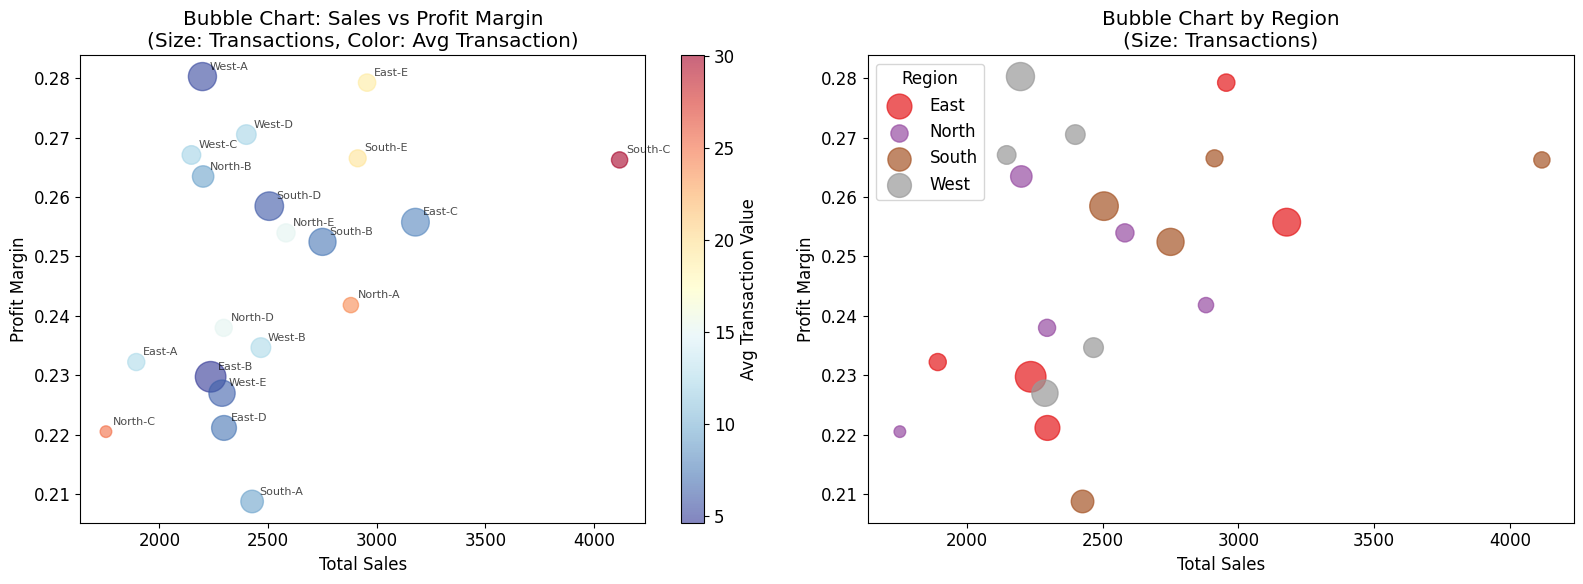

In [20]:
# Create bubble chart data
bubble_data = categories_df.groupby(['region', 'product']).agg({
    'sales': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Add a third dimension (number of transactions)
np.random.seed(42)
bubble_data['transactions'] = np.random.randint(50, 500, len(bubble_data))
bubble_data['avg_transaction'] = bubble_data['sales'] / bubble_data['transactions']

# Static bubble chart with matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Basic bubble chart
scatter = axes[0].scatter(bubble_data['sales'], bubble_data['profit_margin'], 
                         s=bubble_data['transactions'], 
                         c=bubble_data['avg_transaction'], 
                         cmap='RdYlBu_r', alpha=0.6)
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Profit Margin')
axes[0].set_title('Bubble Chart: Sales vs Profit Margin\n(Size: Transactions, Color: Avg Transaction)')
plt.colorbar(scatter, ax=axes[0], label='Avg Transaction Value')

# Add labels to bubbles
for _, row in bubble_data.iterrows():
    axes[0].annotate(f"{row['region']}-{row['product']}", 
                    (row['sales'], row['profit_margin']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.7)

# Bubble chart with category colors
regions = bubble_data['region'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(regions)))
region_color_map = dict(zip(regions, colors))

for region in regions:
    region_data = bubble_data[bubble_data['region'] == region]
    axes[1].scatter(region_data['sales'], region_data['profit_margin'], 
                   s=region_data['transactions'], 
                   c=[region_color_map[region]], 
                   label=region, alpha=0.7)

axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('Profit Margin')
axes[1].set_title('Bubble Chart by Region\n(Size: Transactions)')
axes[1].legend(title='Region')

plt.tight_layout()
plt.show()

# Interactive bubble chart with Plotly
fig = px.scatter(bubble_data, x='sales', y='profit_margin', 
                size='transactions', color='region',
                hover_name='product',
                hover_data=['avg_transaction'],
                title='Interactive Bubble Chart: Sales vs Profit Margin',
                size_max=60)

fig.update_layout(xaxis_title='Total Sales',
                 yaxis_title='Profit Margin')
fig.show()

## 5.3 Radar Charts

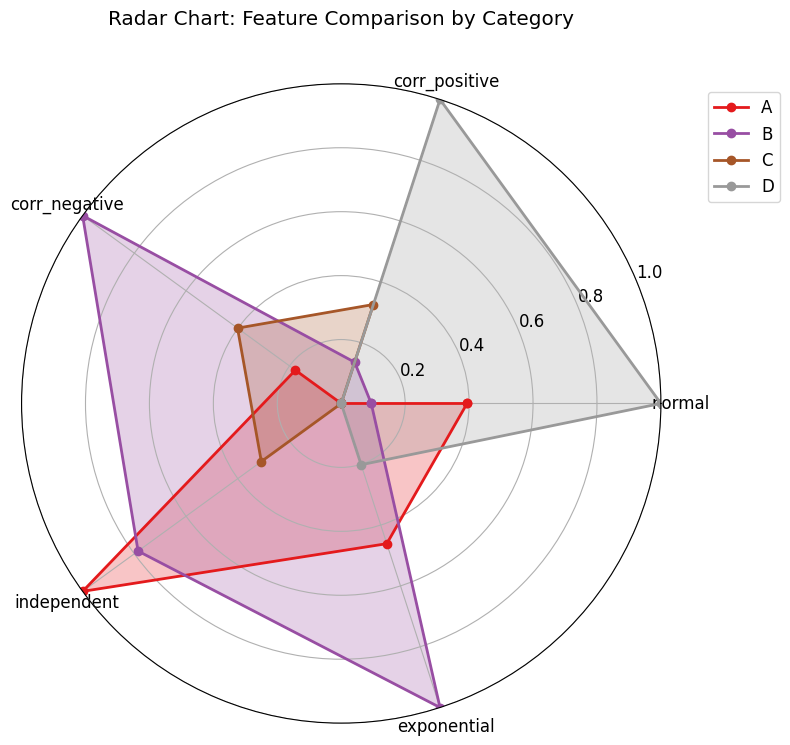

In [21]:
# Prepare data for radar chart
# Normalize features for better comparison
radar_features = ['normal', 'corr_positive', 'corr_negative', 'independent', 'exponential']
radar_data = df[radar_features + ['category']].groupby('category').mean()

# Normalize to 0-1 scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
radar_normalized = pd.DataFrame(scaler.fit_transform(radar_data), 
                               columns=radar_features, 
                               index=radar_data.index)

# Static radar chart with matplotlib
def create_radar_chart(data, categories, title):
    angles = np.linspace(0, 2 * np.pi, len(data.columns), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(categories)))
    
    for i, category in enumerate(categories):
        values = data.loc[category].tolist()
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=2, label=category, color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(data.columns)
    ax.set_ylim(0, 1)
    ax.set_title(title, y=1.08)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

create_radar_chart(radar_normalized, radar_normalized.index, 
                  'Radar Chart: Feature Comparison by Category')

# Interactive radar chart with Plotly
fig = go.Figure()

for category in radar_normalized.index:
    values = radar_normalized.loc[category].tolist()
    values += [values[0]]  # Complete the circle
    
    feature_names = radar_features + [radar_features[0]]
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=feature_names,
        fill='toself',
        name=f'Category {category}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title="Interactive Radar Chart: Feature Comparison by Category"
)

fig.show()



In [22]:
# Multi-comparison radar chart
# Compare different statistical measures
stats_data = df[radar_features].agg(['mean', 'median', 'std']).T
stats_normalized = pd.DataFrame(scaler.fit_transform(stats_data), 
                               columns=stats_data.columns, 
                               index=stats_data.index)

fig = go.Figure()

colors = ['red', 'blue', 'green']
for i, stat in enumerate(stats_normalized.columns):
    values = stats_normalized[stat].tolist()
    values += [values[0]]  # Complete the circle
    
    feature_names = radar_features + [radar_features[0]]
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=feature_names,
        fill='toself',
        name=stat.capitalize(),
        line_color=colors[i]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title="Statistical Measures Comparison: Mean, Median, and Std Dev"
)

fig.show()

# Summary and Best Practices

This notebook covered comprehensive EDA visualization patterns. Here are key takeaways:

## Distribution Analysis
- **Histograms + KDE**: Best for understanding single variable distributions
- **Violin plots**: Combine distribution shape with summary statistics
- **Ridgeline plots**: Excellent for comparing multiple distributions

## Correlation Visualization
- **Heatmaps**: Quick overview of all variable relationships
- **Pair plots**: Detailed view of pairwise relationships
- **Parallel coordinates**: Good for high-dimensional data patterns

## Time Series Visualization
- **Line plots**: Essential for trend identification
- **Seasonal decomposition**: Reveals underlying patterns
- **Calendar heatmaps**: Intuitive for daily/seasonal patterns

## Categorical Analysis
- **Bar charts**: Fundamental for categorical comparisons
- **Treemaps**: Efficient for hierarchical categorical data
- **Sunburst charts**: Interactive hierarchical exploration

## Multivariate Visualization
- **3D scatter plots**: Show three-dimensional relationships
- **Bubble charts**: Encode 4+ dimensions effectively
- **Radar charts**: Compare profiles across multiple metrics

## General Tips
1. **Start simple**: Begin with basic plots before moving to complex visualizations
2. **Consider your audience**: Choose appropriate complexity level
3. **Use color meaningfully**: Color should encode information, not just decoration
4. **Interactive when helpful**: Use interactive plots for exploration, static for reports
5. **Mind the data**: Choose visualizations appropriate for your data types and relationships

In [23]:
# Final summary statistics
print("EDA Visualization Patterns Summary")
print("=" * 40)
print(f"Total data points analyzed: {len(df):,}")
print(f"Time series data points: {len(ts_df):,}")
print(f"Categorical data points: {len(categories_df):,}")
print(f"\nFeatures analyzed: {len(radar_features)}")
print(f"Categories: {df['category'].nunique()}")
print(f"Regions: {categories_df['region'].nunique()}")
print(f"Products: {categories_df['product'].nunique()}")
print("\nVisualization techniques demonstrated:")
techniques = [
    "Histograms with KDE", "Violin plots", "Ridgeline plots",
    "Correlation heatmaps", "Pair plots", "Parallel coordinates",
    "Time series line plots", "Seasonal decomposition", "Calendar heatmaps",
    "Bar charts (multiple types)", "Treemaps", "Sunburst charts",
    "3D scatter plots", "Bubble charts", "Radar charts"
]

for i, technique in enumerate(techniques, 1):
    print(f"{i:2d}. {technique}")

print("\n" + "=" * 40)
print("Module 3: EDA Visualization Patterns - Complete!")

EDA Visualization Patterns Summary
Total data points analyzed: 1,000
Time series data points: 1,095
Categorical data points: 500

Features analyzed: 5
Categories: 4
Regions: 4
Products: 5

Visualization techniques demonstrated:
 1. Histograms with KDE
 2. Violin plots
 3. Ridgeline plots
 4. Correlation heatmaps
 5. Pair plots
 6. Parallel coordinates
 7. Time series line plots
 8. Seasonal decomposition
 9. Calendar heatmaps
10. Bar charts (multiple types)
11. Treemaps
12. Sunburst charts
13. 3D scatter plots
14. Bubble charts
15. Radar charts

Module 3: EDA Visualization Patterns - Complete!
